# Intervalos de Confiança

Neste notebook, vamos aprender a calcular intervalos de confiança.

## Uma breve introdução

Embora intervalos de confiança sejam amplamente usados, pode ser difícil entender seu conceito e quando devemos usá-lo. Então vamos a um exemplo:

Suponha que você queira saber qual a porcentagem de pessoas nos Brasil que amam futebol. Para obter uma resposta 100% correta a essa pergunta, você deveria perguntar a cada um dos 212 milhões habitantes se eles amam ou não futebol. Obviamente, não é viável falar com 212 milhões de pessoas.

Você poderia então obter uma amostra aleatória de brasileiros (falando com muito menos pessoas) para obter a porcentagem de pessoas que amam futebol nessa amostra. Contudo, assim não estaria 100% confiante de que esse número está certo ou quão longe esse número está da resposta real.

Você poderia tentar obter um intervalo, como: “Tenho 95% de certeza que a porcentagem de pessoas que amam futebol no Brasil está entre 58% e 62%”. É daí que vem o nome Intervalo de confiança, temos um intervalo e temos alguma confiança sobre ele.

## Como calcular intervalos de confiança

O cálculo do intervalo de confiança (ou CI, Confidence Interval) envolve a melhor estimativa obtida pela amostra (média ou mediana) e uma margem de erro. A margem de erro é calculada usando o Z-score para a confiança desejada multiplicada pelo desvio padrão amostral da média.


$$\left(\overline{X} - Z\frac{s}{\sqrt{n}},~\overline{X} + Z\frac{s}{\sqrt{n}}\right)$$

Em que $\overline X$ é a média amostral, $Z$ é o valor de Z-score associado ao nível de confiança desejado, e $\dfrac{s}{\sqrt{n}}$ é o desvio padrão amostral da média.

Aqui estão os z-scores para os níveis de confiança mais comuns:

| Confiança |  $Z$ |
|   :----:  | :--: |
| 75%       | 1.15 |
| 90%       | 1.64 |
| 95%       | 1.96 |
| 99%       | 2.57 |

## Vamos ao código!

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de dados
Para este exercício, vamos utilizar uma base de dados do site [basedosdados.org](https://basedosdados.org), uma organização colaborativa que cataloga e divulga dados públicos brasileiros. Vocês podem usar esse site para buscar bases para projetos acadêmicos, sempre que necessitarem. Outro exemplo de site de reúne bases abertas (nesse caso, americanas) é o [UCI](https://archive.ics.uci.edu/ml/index.php).

Vamos usar a base de "Indicadores de Mobilidade e Transportes em 2010" para analisar os dados sobre tempo médio de deslocamento casa-trabalho para o ano de 2010.

Para usar o arquivo, podemos usar duas opções: (1)  baixar o csv e importá-lo (usando pandas), ou (2) usar diretamente o pacote do basededados.

### Opção 1:
Baixar a tabela 'tempo_deslocamento_casa_trabalho' em https://basedosdados.org/dataset/br-mobilidados-indicadores, adicionar em Files (menu da esquerda) e importar com pandas.

Se o link acima não estiver funcionando, tente: [staging.basedosdados](https://staging.basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=tempo_deslocamento_casa_trabalho)

In [31]:
df = pd.read_csv("tempo_deslocamento_casa_trabalho.csv")

### Opção 2:
Instalar o pacote basedosdados, e importar a base diretamente. Mais detalhes em: https://basedosdados.github.io/mais/access_data_packages/#primeiros-passos.

Vocês terão que criar um projeto em https://console.cloud.google.com/projectselector2/home/dashboard?pli=1 para pegar o billing_project_id (ID do projeto)

In [32]:
# !pip install basedosdados
# import basedosdados as bd
# # Para carregar o dado direto no pandas
# df = bd.read_table(
#     dataset_id='br_mobilidados_indicadores',
#   table_id='tempo_deslocamento_casa_trabalho',\
#   billing_project_id="<YOUR_PROJECT_ID>"  # colocar aqui o ID do projeto do gcloud
# )

In [33]:
df

,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,1100205,28,7.0
1,2010,AC,1200401,26,5.0
2,2010,PA,1202400,21,3.0
3,2010,PA,1206500,25,7.0
4,2010,AM,1302603,41,17.0
...,...,...,...,...,...
224,2010,GO,5220686,16,2.0
225,2010,GO,5221858,47,28.0
226,2010,GO,5222203,25,5.0
227,2010,GO,5222302,24,8.0


Antes de começarmos a análise, é importante explorar se há valores faltantes.

In [34]:
df['tempo_medio_deslocamento'].isnull().sum()

0

Não há valores faltantes.

### Vamos calcular o intervalo de confiança para o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.

In [35]:
## Primeiro, vamos calcular a media e o desvio padrao
df_mg = df[df['sigla_uf']=='MG']

media_mg = df_mg['tempo_medio_deslocamento'].mean()
std_mg = df_mg['tempo_medio_deslocamento'].std(ddof=0)

print(
    f'O tempo médio de deslocamento no estado de MG é de',
    f'{np.round(media_mg,2)}, e o desvio padrão é de, {np.round(std_mg,2)}'
)

O tempo médio de deslocamento no estado de MG é de 33.95, e o desvio padrão é de, 10.49


In [36]:
## Agora, voltando à tabela do Z-score, vemos que o valor de Z
## correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

sqrt_size_mg = np.sqrt(len(df_mg))

z = 1.96
CI_inf_mg = media_mg - z*(std_mg/sqrt_size_mg)
CI_sup_mg = media_mg + z*(std_mg/sqrt_size_mg)

In [37]:
print(f'({np.round(CI_inf_mg,2)}, {np.round(CI_sup_mg,2)})')

(30.61, 37.28)


## Exercício 1

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de MG, considerando um nível de confiança de 90%?

In [38]:
#Z score para 90% de confiança
z_novo = 1.645

CI_inf_mg_novo = media_mg - z_novo*(std_mg/sqrt_size_mg)
CI_sup_mg_novo = media_mg + z_novo*(std_mg/sqrt_size_mg)

print(f'({np.round(CI_inf_mg_novo,2)}, {np.round(CI_sup_mg_novo,2)})')

(31.15, 36.75)


## Exercício 2

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [39]:
df_sp = df[df['sigla_uf']=='SP']

media_sp = df_sp['tempo_medio_deslocamento'].mean()
std_sp = df_sp['tempo_medio_deslocamento'].std(ddof=0)

print(
    f'O tempo médio de deslocamento no estado de SP é de',
    f'{np.round(media_sp,2)}, e o desvio padrão é de, {np.round(std_sp,2)}'
)

sqrt_size_sp = np.sqrt(len(df_sp))

z = 1.96

CI_inf_sp = media_sp - z*(std_sp/sqrt_size_sp)
CI_sup_sp = media_sp + z*(std_sp/sqrt_size_sp)

print(f'({np.round(CI_inf_sp,2)}, {np.round(CI_sup_sp,2)})')

O tempo médio de deslocamento no estado de SP é de 44.51, e o desvio padrão é de, 8.33
(41.9, 47.13)


## Exercício 3

Qual é o CI do tempo **mediano** de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [40]:
df_sp = df[df['sigla_uf']=='SP']

mediana_sp = np.zeros(10000)

for i in range(10000):
    sample = df_sp['tempo_medio_deslocamento'].sample(len(df_sp), replace=True)
    mediana_sp[i] = sample.median()

CI_inf_sp = np.percentile(mediana_sp, 2.5)
CI_sup_sp = np.percentile(mediana_sp, 97.5)

print(f'({np.round(CI_inf_sp,2)}, {np.round(CI_sup_sp,2)})')

(40.0, 48.0)


### Biblioteca scipy.stats

O módulo de funções estatísticas scipy stats nos permite calcular o CI chamando apenas uma função. Para maiores informações, ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

In [41]:
import scipy.stats as st

# Voltando ao problema inicial, vamos calcular o intervalo de confiança para
# o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.
# confidence = nivel de confiança
# loc = array dos dados para media
# scale = desvio padrão amostral da média

ci = st.norm.interval(
    confidence=0.95,
    loc=media_mg,
    scale=st.sem(
        df_mg['tempo_medio_deslocamento'],
        ddof=0,
        nan_policy='omit'
    )
)

In [42]:
np.round(ci,2)

array([30.61, 37.28])

In [43]:
#Testando as outras CIs
ci = st.norm.interval(
    confidence=0.90,
    loc=media_mg,
    scale=st.sem(
        df_mg['tempo_medio_deslocamento'],
        ddof=0,
        nan_policy='omit'
    )
)

np.round(ci,2)

array([31.15, 36.75])

## Exercício 4

Usando a biblioteca scipy.stats, calcule e imprima o CI do tempo médio de deslocamento para cada estado brasileiro, com nível de confiança de 99% .

In [44]:
# Dica: a função unique dá o array de todos os estados
estados = df['sigla_uf'].unique()
estados

array(['RO', 'AC', 'PA', 'AM', 'RR', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [45]:
for i in estados:
  df_estado = df[df['sigla_uf']==i]
  media_estado = df_estado['tempo_medio_deslocamento'].mean()
  ci = st.norm.interval(
    confidence=0.99,
    loc=media_estado,
    scale=st.sem(
        df_estado['tempo_medio_deslocamento'],
        ddof=0,
        nan_policy='omit'
    )
  )
  print(f'{i} -> CI: {np.round(ci,2)}')

RO -> CI: [nan nan]
AC -> CI: [nan nan]
PA -> CI: [25.98 40.02]
AM -> CI: [nan nan]
RR -> CI: [nan nan]
AP -> CI: [nan nan]
TO -> CI: [nan nan]
MA -> CI: [nan nan]
PI -> CI: [nan nan]
CE -> CI: [22.25 29.01]
RN -> CI: [nan nan]
PB -> CI: [nan nan]
PE -> CI: [34.31 43.82]
AL -> CI: [nan nan]
SE -> CI: [nan nan]
BA -> CI: [27.55 35.06]
MG -> CI: [29.56 38.33]
ES -> CI: [nan nan]
RJ -> CI: [39.85 51.49]
SP -> CI: [41.08 47.95]
PR -> CI: [29.2  37.97]
SC -> CI: [nan nan]
RS -> CI: [nan nan]
MS -> CI: [nan nan]
MT -> CI: [nan nan]
GO -> CI: [24.13 36.13]
DF -> CI: [nan nan]


c:\Users\thais\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\thais\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


## Exercício 5
Se não há valores nulos, por que a função retorna NA para alguns estados?

Isso ocorre pois a função que calcula o erro padrão retorna NA caso a amostra possua tamanho insuficiente, ou sejá quando existe apenas um dado a ser analisado. Dessa forma os estados que retornaram nan possuem apenas uma observação no banco de dados.

## Exercício 6

Crie uma visualização (a seu critério) para mostrar os intervalos de confiança dos estados com valores não nulos. Qual padrão você observa?

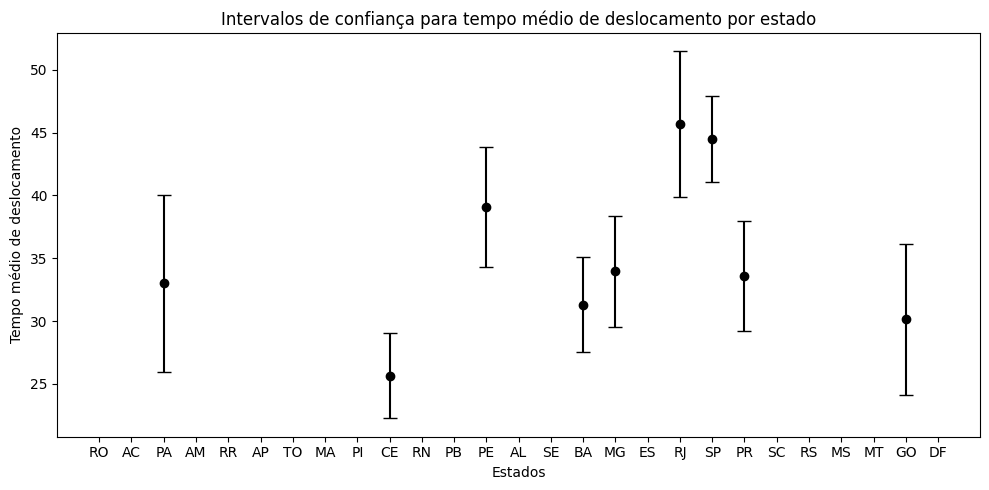

In [46]:
means = []
CI = []
estados = df['sigla_uf'].unique()

#Calculo dos intervalos de confiança
for i in estados:
  df_estado = df[df['sigla_uf']==i]
  media_estado = df_estado['tempo_medio_deslocamento'].mean()
  ci = st.norm.interval(
    confidence=0.99,
    loc=media_estado,
    scale=st.sem(
        df_estado['tempo_medio_deslocamento'],
        ddof=0,
        nan_policy='omit'
    )
  )

  if np.isnan(ci).sum() == 0:
    means.append(media_estado)
    CI.append((ci[1] - ci[0])/2)  # metade do tamanho de CI
  else:
    means.append(np.nan)
    CI.append(np.nan)

#Plotando o gráfico
plt.figure(figsize=(10,5))
plt.errorbar(x = estados, y = means, yerr = CI,  fmt='o', capsize=5, color='black')
plt.xlabel('Estados')
plt.ylabel('Tempo médio de deslocamento')
plt.title('Intervalos de confiança para tempo médio de deslocamento por estado')
plt.tight_layout()
plt.show()